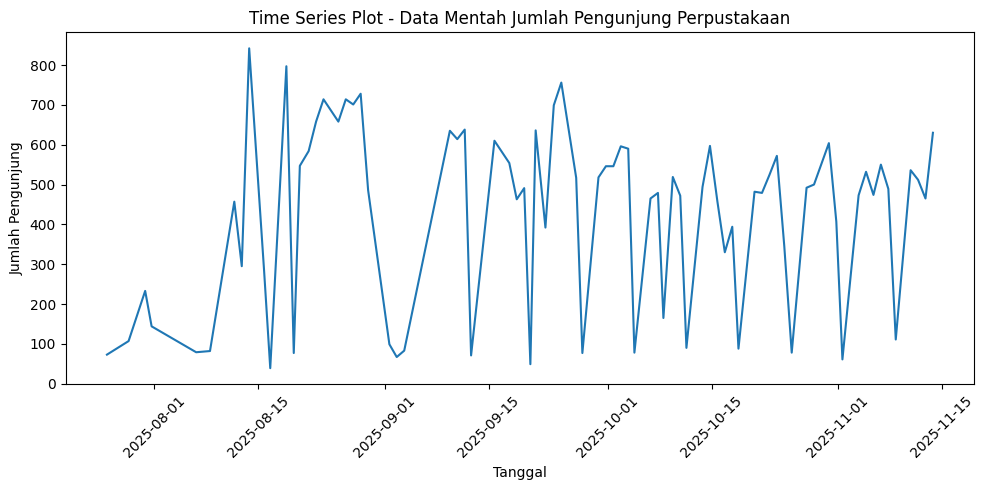

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('dummy_pengunjung_perpustakaan.xlsx')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(df['Tanggal'], df['Jumlah_Pengunjung'])
plt.title("Time Series Plot - Data Mentah Jumlah Pengunjung Perpustakaan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("dummy_pengunjung_perpustakaan.xlsx")
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

# Rename for simplicity
df['Actual'] = df['Jumlah_Pengunjung']
data = df['Actual']

# MA(3)
df['MA3'] = data.rolling(window=3).mean()

# MA(5)
df['MA5'] = data.rolling(window=5).mean()

# WMA (0.5, 0.3, 0.2)
weights = np.array([0.5, 0.3, 0.2])
def wma(series):
    return np.sum(weights * series[::-1])

df['WMA'] = data.rolling(window=3).apply(wma, raw=True)

# Forecast errors
df['Error_MA3'] = df['Actual'] - df['MA3']
df['Error_MA5'] = df['Actual'] - df['MA5']
df['Error_WMA'] = df['Actual'] - df['WMA']

# RMSE
rmse_ma3 = np.sqrt(np.nanmean(df['Error_MA3']**2))
rmse_ma5 = np.sqrt(np.nanmean(df['Error_MA5']**2))
rmse_wma = np.sqrt(np.nanmean(df['Error_WMA']**2))

rmse_results = pd.DataFrame({
    'Model': ['MA3', 'MA5', 'WMA'],
    'RMSE': [rmse_ma3, rmse_ma5, rmse_wma]
})

# Determine best model
best_model = rmse_results.loc[rmse_results['RMSE'].idxmin(), 'Model']

# Forecast 6 periods ahead using best model
last_values = data.iloc[-5:]

forecasts = []
if best_model == 'MA3':
    window = 3
    for _ in range(6):
        f = last_values[-3:].mean()
        forecasts.append(f)
        last_values = pd.concat([last_values, pd.Series([f])])
elif best_model == 'MA5':
    window = 5
    for _ in range(6):
        f = last_values[-5:].mean()
        forecasts.append(f)
        last_values = pd.concat([last_values, pd.Series([f])])
elif best_model == 'WMA':
    for _ in range(6):
        f = np.sum(weights * last_values[-3:].values[::-1])
        forecasts.append(f)
        last_values = pd.concat([last_values, pd.Series([f])])

forecast_df = pd.DataFrame({'Forecast_6_Period_Ahead': forecasts})

df, rmse_results, best_model, forecast_df


(               Tanggal  Jumlah_Pengunjung  Actual         MA3    MA5    WMA  \
 0  2025-07-25 15:23:18                 73      73         NaN    NaN    NaN   
 1  2025-07-28 13:14:49                107     107         NaN    NaN    NaN   
 2  2025-07-30 18:48:25                233     233  137.666667    NaN  163.2   
 3  2025-07-31 15:37:58                144     144  161.333333    NaN  163.3   
 4  2025-08-06 15:28:28                 79      79  152.000000  127.2  129.3   
 ..                 ...                ...     ...         ...    ...    ...   
 74 2025-11-08 18:43:39                111     111  383.333333  431.2  312.2   
 75 2025-11-10 18:47:31                536     536  378.666667  432.0  399.1   
 76 2025-11-11 18:43:07                512     512  386.333333  439.6  439.0   
 77 2025-11-12 18:44:09                465     465  504.333333  422.6  493.3   
 78 2025-11-13 18:44:37                630     630  535.666667  450.8  556.9   
 
      Error_MA3  Error_MA5  Error_WMA 

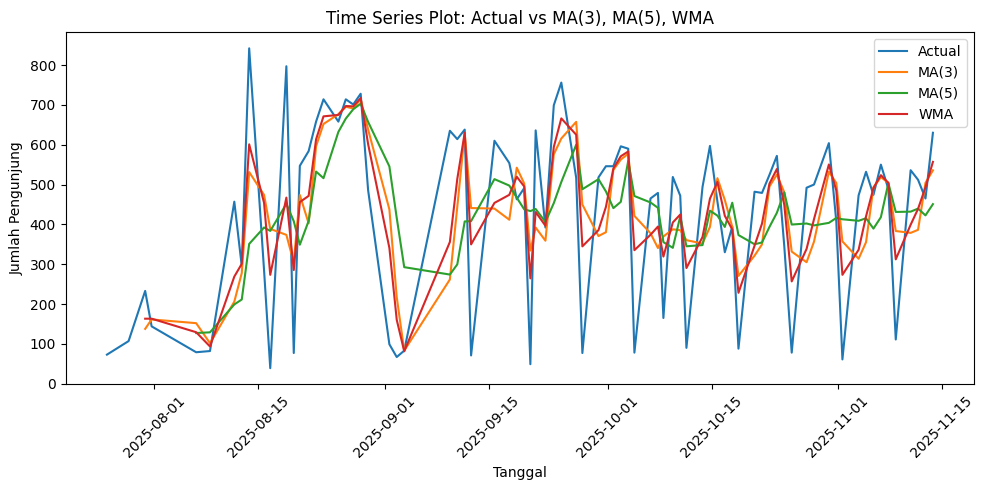

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('dummy_pengunjung_perpustakaan.xlsx')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal').reset_index(drop=True)

df['Actual'] = df['Jumlah_Pengunjung']

# MA3
df['MA3'] = df['Actual'].rolling(window=3).mean()
df['MA5'] = df['Actual'].rolling(window=5).mean()

# WMA
weights = np.array([0.5, 0.3, 0.2])
def wma(series):
    return np.sum(weights * series[::-1])
df['WMA'] = df['Actual'].rolling(window=3).apply(wma, raw=True)

# ========== PLOT 1: Actual vs MA3, MA5, WMA ==========
plt.figure(figsize=(10,5))
plt.plot(df['Tanggal'], df['Actual'], label='Actual')
plt.plot(df['Tanggal'], df['MA3'], label='MA(3)')
plt.plot(df['Tanggal'], df['MA5'], label='MA(5)')
plt.plot(df['Tanggal'], df['WMA'], label='WMA')
plt.legend()
plt.title("Time Series Plot: Actual vs MA(3), MA(5), WMA")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
